In [1]:
from __future__ import print_function, division
from builtins import range
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
np.random.seed(1)
NUM_TRIALS = 2000
BANDIT_MEANS = [1, 2, 3]

For the updates, take these formulas into consideration.   
These formulas are the result of expanding the posterior $p(X|\mu)p(\mu)$ and $p(\mu | X)$.
$\mu$ is the varaible, assume precision is known.


$ \lambda = \tau N +\lambda_{0} $    Posterior precision for  $\lambda $ (eq. 1) 

$ m = \frac{1}{\lambda}(\tau \sum_{i=1}^{N}(x_{i} + \lambda_{0}m_{0}) $ Posterior mean for $m$ (eq. 2)

$ m = \frac{1}{\tau N + \lambda_{0}}(\tau \sum_{i=1}^{N}(x_{i} + \lambda_{0}m_{0}) $ Posterior mean for $m$ (eq. 2) ALT VERSION


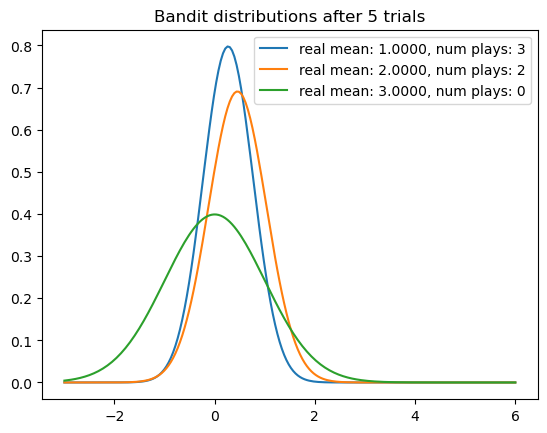

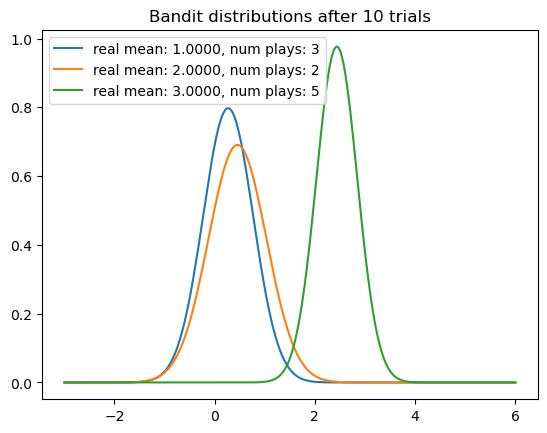

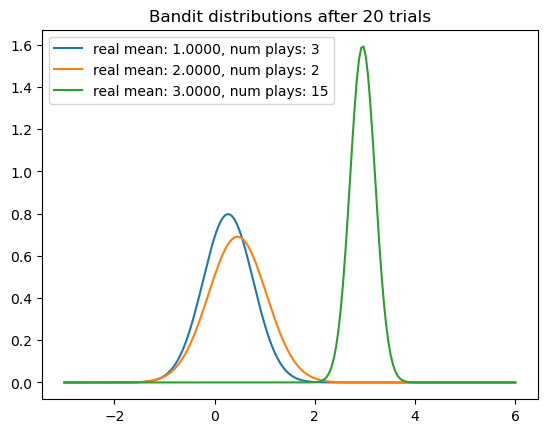

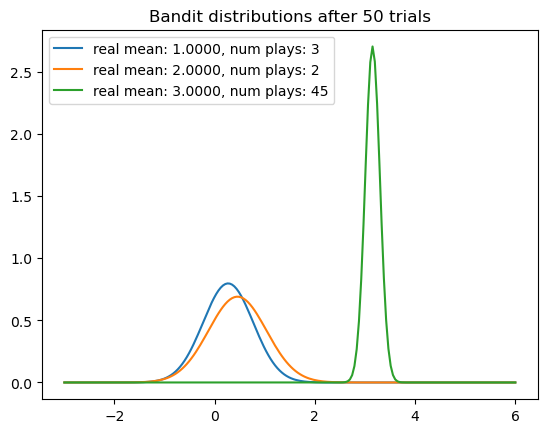

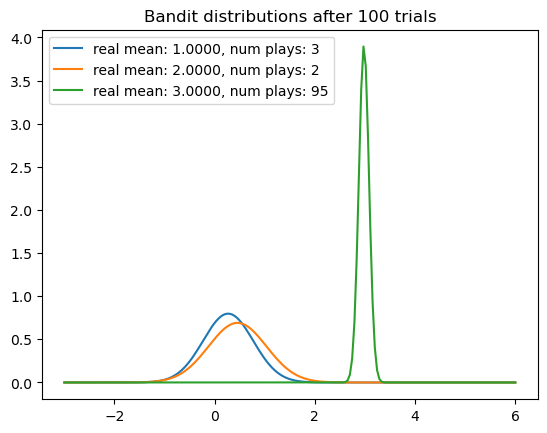

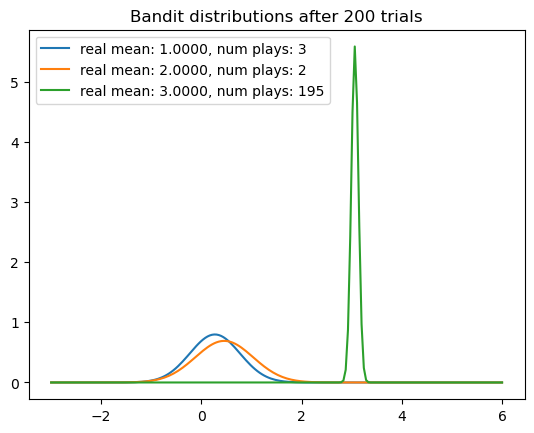

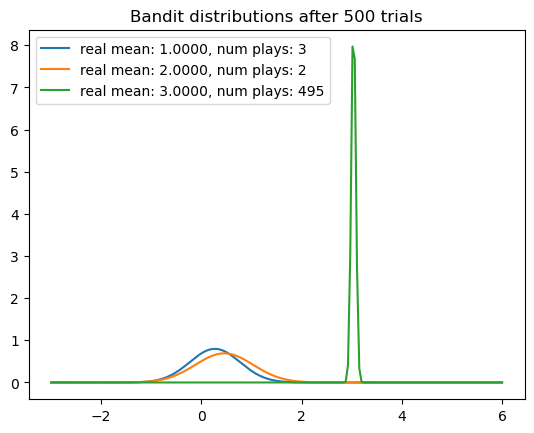

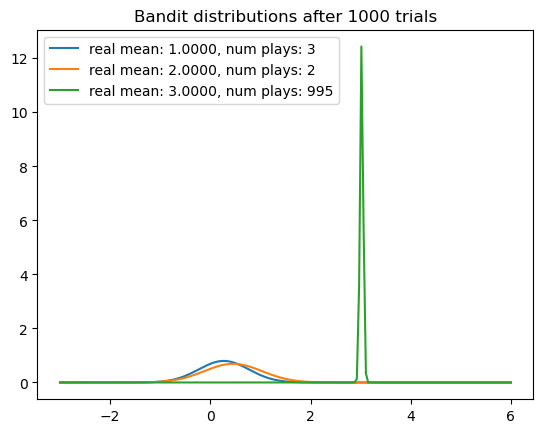

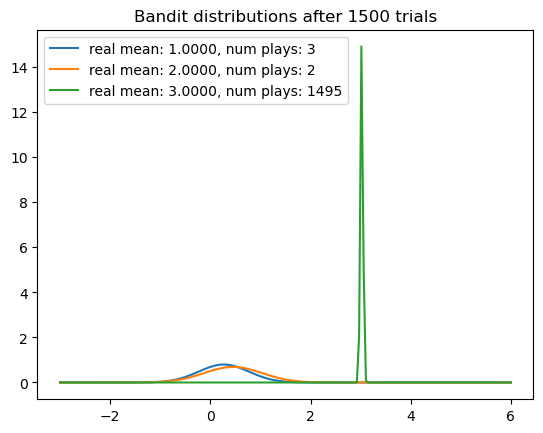

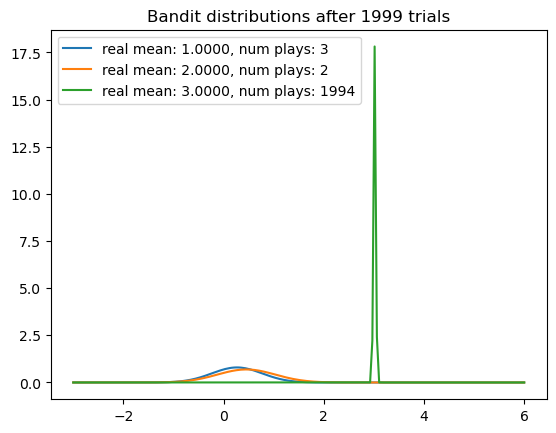

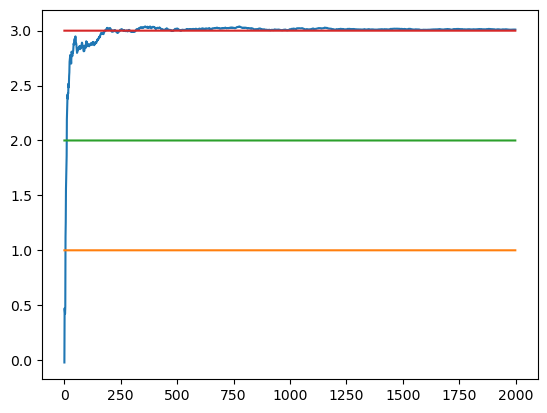

In [7]:
class Bandit:
    def __init__(self, true_mean):
        self.true_mean = true_mean
        # parameters for mu - prior is N(0,1)
        self.predicted_mean = 0 # The mean of the mean of X
        self.lambda_ = 1
        self.sum_x = 0 #(for convenience)
        self.tau = 1
        self.N = 0

    def pull(self):
        return np.random.randn() / np.sqrt(self.tau) + self.true_mean

    def sample(self):
        return np.random.randn() / np.sqrt(self.lambda_) + self.predicted_mean

    def update(self, x):
        self.lambda_ += self.tau  # Ver eq.1, tau se inició en 1 y N siempre es 1 porque estamos haciendo updates de 1 en 1
        self.sum_x += x
        self.N += 1
        self.predicted_mean = self.tau*self.sum_x /self.lambda_ # Ver con la eq.2
        # ALT UPDATE: self.predicted_mean = (self.tau * x + self.lambda_ * self.m) / (self.tau + self.lambda_)
        Esta 

def plot(bandits, trial):
    x = np.linspace(-3, 6, 200)
    for b in bandits:
        y = norm.pdf(x, b.predicted_mean, np.sqrt(1. / b.lambda_))
        plt.plot(x, y, label=f"real mean: {b.true_mean:.4f}, num plays: {b.N}")
    plt.title(f"Bandit distributions after {trial} trials")
    plt.legend()
    plt.show()


def run_experiment():
    bandits = [Bandit(m) for m in BANDIT_MEANS]

    sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
    rewards = np.empty(NUM_TRIALS)
    for i in range(NUM_TRIALS):
        # Thompson sampling
        j = np.argmax([b.sample() for b in bandits])

        # plot the posteriors
        if i in sample_points:
            plot(bandits, i)

        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()

        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)

        # update rewards
        rewards[i] = x

    cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    for m in BANDIT_MEANS:
        plt.plot(np.ones(NUM_TRIALS)*m)
    plt.show()

    return cumulative_average

if __name__ == '__main__':
    run_experiment()